In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import tiktoken

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from notebooks.models.tokenizers import CustomTokenizer


In [2]:
wikipedia = pd.read_csv('../../dataset.csv', index_col=0)

wikipedia

,id,url,title,text,category
416,26941,https://en.wikipedia.org/wiki/Spike%20Lee,Spike Lee,"Shelton Jackson ""Spike"" Lee (born March 20, 19...",actors
697,43337,https://en.wikipedia.org/wiki/Katharine%20Hepburn,Katharine Hepburn,"Katharine Houghton Hepburn (May 12, 1907 – Jun...",actors
1168,78127,https://en.wikipedia.org/wiki/James%20Doohan,James Doohan,"James Montgomery Doohan (; March 3, 1920 – Jul...",actors
1317,89695,https://en.wikipedia.org/wiki/William%20Christ...,William Christopher,"William Christopher (October 20, 1932 Decembe...",actors
1442,96406,https://en.wikipedia.org/wiki/Richard%20Greene,Richard Greene,Richard Marius Joseph Greene (25 August 1918 –...,actors
...,...,...,...,...,...
198385,68565885,https://en.wikipedia.org/wiki/1992%20Nigerian%...,1992 Nigerian Senate elections in Delta State,The 1992 Nigerian Senate election in Delta Sta...,events
199111,68862408,https://en.wikipedia.org/wiki/2022%20Valenzuel...,2022 Valenzuela local elections,Local elections will be held in Valenzuela on ...,events
199302,68973980,https://en.wikipedia.org/wiki/Sara%20Bay%20Cla...,Sara Bay Classic,The Sara Bay Classic was a tournament on the S...,events
200401,69486421,https://en.wikipedia.org/wiki/List%20of%20eart...,List of earthquakes in Malaysia,This is a list of earthquakes in Malaysia:\n\n...,events


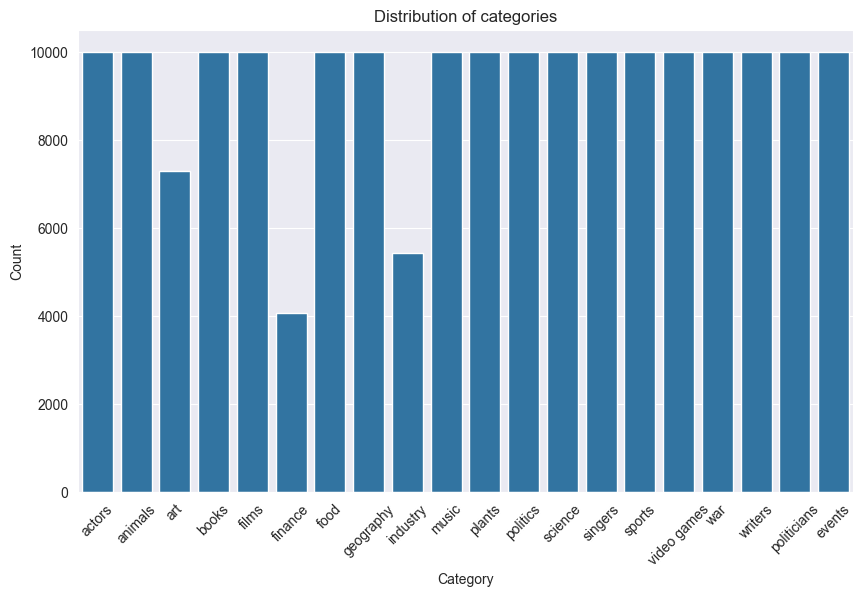

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=wikipedia)

plt.title('Distribution of categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [4]:
wiki = wikipedia.sample(frac=1)

wiki_X = wiki['text']
wiki_y = wiki['category']

X_train, X_test, y_train, y_test = train_test_split(wiki_X, wiki_y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [5]:
# Pour laisser les stop words, modifier l'argument de stop_words par None, pour les enlever, mettre 'english'
model = make_pipeline(CountVectorizer(ngram_range = (1,1), stop_words='english'), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Features dimension: (149439, 1024257)
Classification Report:
               precision    recall  f1-score   support

      actors       0.76      0.87      0.81      1892
     animals       0.97      0.87      0.92      2036
         art       0.94      0.90      0.92      1469
       books       0.86      0.76      0.80      1932
      events       0.86      0.41      0.56      2028
       films       0.86      0.98      0.91      2014
     finance       0.82      0.43      0.56       828
        food       0.93      0.56      0.70      2049
   geography       0.72      0.87      0.79      2032
    industry       0.62      0.52      0.57      1040
       music       0.95      0.91      0.93      1985
      plants       0.98      0.95      0.96      2011
 politicians       0.67      0.79      0.72      2030
    politics       0.51      0.74      0.60      2035
     science       0.84      0.89      0.86      1966
     singers       0.73      0.94      0.82      1993
      sports       

Plot Confusion Matrix

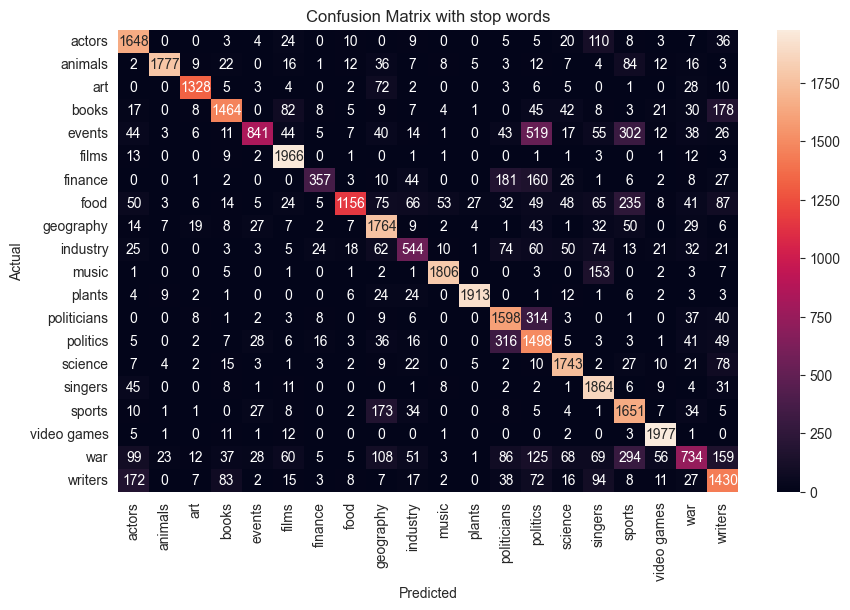

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with stop words')
plt.show()

In [7]:
test_string = X_test.iloc[20][len(X_test.iloc[20])//2:]

In [8]:
print("With text in half:", model.predict([test_string]))
print("With full text:", model.predict([X_test.iloc[20]]))

With text in half: ['singers']
With full text: ['singers']


In [9]:
X_test.iloc[20]

'Lou Fanánek Hagen (real name František Moravec, born 18 June 1966) is a Czech musician, composer, lyricist, and frontman of the punk band Tři sestry.\n\nCareer\n\nTři sestry\nIn 1985, František Moravec became the singer and frontman of the punk band Tři sestry and adopted the moniker Lou Fanánek Hagen, naming himself after his two idols, Nina Hagen and Lou Reed. He has remained with the band throughout their career. In 2021, they released their latest album, titled Sex drógy rokenról.\n\nOther activities\nAfter the Velvet Revolution, Hagen began composing songs for Těžkej Pokondr, as well as for other well-known artists, such as Karel Gott, Lucie Bílá, Hana Zagorová, Věra Špinarová, and Maxim Turbulenc.\n\nBetween 1992 and 1993, he fronted the punk band Hagen Baden with David Matásek from Orlík. The group also included Jakub Maleček, Ronald Seitl, and Martin Roubínek. They released two albums: Hagen Baden (1992) and Ahoj kluci (1993).\n\nIn 2001, he participated in the composition of 

In [10]:
y_test.iloc[20]

'singers'

In [11]:
from collections import Counter

count_c = Counter(y_train)

priors = {k:v/len(y_train) for k, v in count_c.items()}
print(priors)

train_strings = " ".join(X_train)
# Nous utilisons le word_tokenizer, et pour enlever les stop_words, mettre True à l'argument remove_stopwords
tokenizer = CustomTokenizer(type='word', remove_stopwords=False)
train_tokens = tokenizer.encode(train_strings)
vocabulary = set(train_tokens)
V = len(vocabulary)
classes = set(y_train)

{'video games': 0.053439865095457006, 'food': 0.05320565581943134, 'art': 0.03895904014346991, 'science': 0.053761066388292214, 'finance': 0.021714545734379913, 'films': 0.053439865095457006, 'actors': 0.05425625171474648, 'politicians': 0.05333279799784527, 'war': 0.05337963985305041, 'books': 0.05398858397071715, 'sports': 0.05372760792028854, 'singers': 0.05358039066107241, 'plants': 0.053459940176259206, 'politics': 0.05329933952984161, 'events': 0.053346181385046744, 'writers': 0.05345324848265848, 'geography': 0.05331941461064381, 'music': 0.05363392420987828, 'industry': 0.029409993375223334, 'animals': 0.053292647836240874}


In [12]:
train_df = pd.DataFrame(zip(X_train, y_train), columns = ["text", "category"])
train_df.head()

,text,category
0,Last Ninja 2: Back with a Vengeance is an acti...,video games
1,Jens Björklund (30 December 1910 – 10 January ...,food
2,William Blake's Illustrations of the Book of J...,art
3,The Database of Macromolecular Motions is a bi...,science
4,Small Enterprise Foundation (SEF) is a microfi...,finance


In [13]:
mega_dict = dict()
prob_dict = dict()
k = 1

for c in classes:
    class_df = train_df.query(f"category == '{c}'")
    mega_document = class_df["text"]
    mega_strings = " ".join(mega_document)
    mega_tokens = word_tokenize(mega_strings)
    mega_count = Counter(mega_tokens)
    mega_dict[c] = mega_count
    prob_dict[c] = dict()


    for token in vocabulary:
        prob_dict[c][token] = (mega_dict[c][token] + k ) / (len(mega_tokens) + V)

print(mega_dict["sports"]["i"])
print(prob_dict["sports"]["i"])

32
5.913983793892289e-06


In [14]:
import math

test_tokens = word_tokenize("is an American")

pred_dict = dict()

for c in classes:
    sum = math.log2(priors[c])
    for token in test_tokens:
        #print(prob_dict[c][token])
        sum += math.log2(prob_dict[c][token])
    sum = math.pow(2, sum)
    pred_dict[c] = sum
print(pred_dict)
print(max(pred_dict, key=pred_dict.get))

{'food': 4.682270975752363e-10, 'music': 2.212055903993255e-10, 'sports': 2.3904051354768436e-10, 'video games': 3.4059455460442035e-10, 'events': 2.7681415520741797e-10, 'writers': 9.169674759713313e-10, 'actors': 9.51299139060198e-10, 'politics': 3.640488922669718e-10, 'finance': 7.234939442413298e-11, 'plants': 2.6055353254162235e-10, 'war': 3.777303703880967e-10, 'films': 4.527335470046109e-09, 'science': 2.2150236053930927e-09, 'industry': 3.084211548349922e-10, 'animals': 3.795905520057386e-10, 'singers': 6.18224210920164e-10, 'politicians': 3.0844692456806635e-10, 'books': 1.305939748853308e-09, 'geography': 5.45053419045163e-10, 'art': 2.584564277986248e-10}
films


In [15]:
import math

test_tokens = [word_tokenize(text) for text in X_test]

pred_dict = dict()
preds = list()

for report_tokens in test_tokens:
    for c in classes:
        sum = math.log2(priors[c])
        for token in report_tokens:
            if token in prob_dict[c]: # remove unknown tokens
                sum += math.log2(prob_dict[c][token])
        sum = math.pow(2, sum)
        pred_dict[c] = sum
    preds.append(max(pred_dict, key=pred_dict.get))

In [16]:
from sklearn.metrics import classification_report

print(classification_report(preds, list(y_test)))

              precision    recall  f1-score   support

      actors       0.08      0.79      0.14       189
     animals       0.49      0.98      0.65      1005
         art       0.12      0.97      0.22       183
       books       0.05      0.96      0.09        97
      events       0.08      0.93      0.14       164
       films       0.06      0.97      0.10       114
     finance       0.04      0.92      0.08        38
        food       0.94      0.06      0.11     32327
   geography       0.16      0.78      0.26       403
    industry       0.01      0.79      0.03        19
       music       0.10      0.95      0.18       203
      plants       0.40      0.99      0.57       808
 politicians       0.17      0.81      0.29       436
    politics       0.08      0.64      0.14       250
     science       0.09      0.91      0.16       189
     singers       0.03      0.62      0.06        95
      sports       0.20      0.62      0.30       631
 video games       0.03    

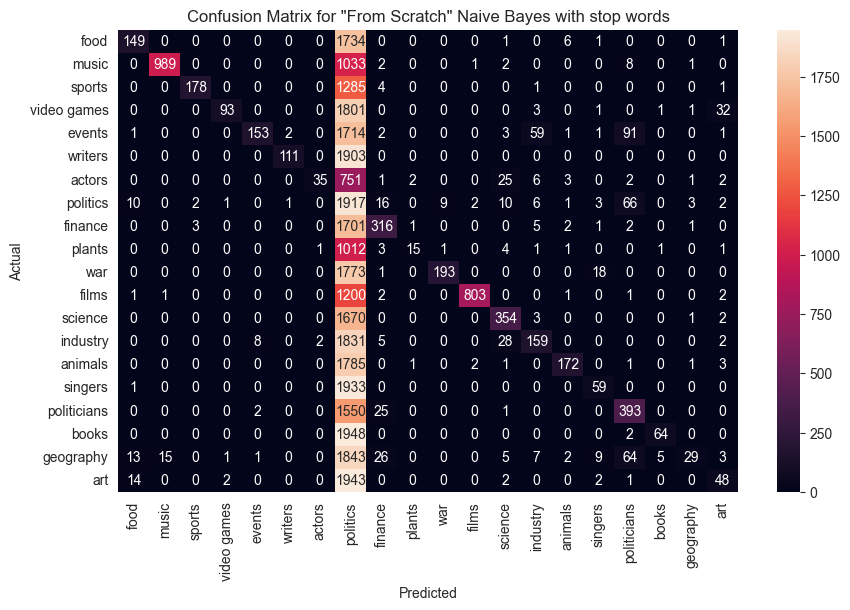

In [17]:
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for "From Scratch" Naive Bayes with stop words')
plt.show()